<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with `scikit-learn`

_Authors: Alex Sherman (DC)_

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

### Lesson Guide
- [Learning Objectives](#learning-objectives)
- [Overview of the Iris Data Set](#overview-of-the-iris-dataset)
	- [Terminology](#terminology)
- [Exercise: "Human Learning" With Iris Data](#exercise-human-learning-with-iris-data)
- [Human Learning on the Iris Data Set](#human-learning-on-the-iris-dataset)
- [K-Nearest Neighbors (KNN) Classification](#k-nearest-neighbors-knn-classification)
	- [Using the Train/Test Split Procedure (K=1)](#using-the-traintest-split-procedure-k)
- [Tuning a KNN Model](#tuning-a-knn-model)
	- [What Happens If We View the Accuracy of our Training Data?](#what-happen-if-we-view-the-accuracy-of-our-training-data)
	- [Training Error Versus Testing Error](#training-error-versus-testing-error)
- [Standardizing Features](#standardizing-features)
	- [Use `StandardScaler` to Standardize our Data](#use-standardscaler-to-standardize-our-data)
- [Comparing KNN With Other Models](#comparing-knn-with-other-models)

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will automatedly make a model using kNN.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

<a id="overview-of-the-iris-dataset"></a>
## Overview of the Iris Data Set
---

In [108]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np

data = 'data/iris.data'
iris = pd.read_csv(data)

In [109]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: iris species.
- **Classification problem** because response is categorical.

<a id="exercise-human-learning-with-iris-data"></a>
## Exercise: "Human Learning" With Iris Data

* **20 min **

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Display plots in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#### Read the iris data into a pandas DataFrame, including column names.

In [111]:
# Define the URL from which to retrieve the data (as a string).
path = 'data/iris.data'

# Retrieve the CSV file and add the column names.
iris = pd.read_csv(path)

#### Gather some basic information about the data.

In [112]:
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [113]:
iris.shape

(150, 5)

In [114]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [115]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [117]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [118]:
# Sort the DataFrame by petal_width.
iris.sort_values('petal_width')

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [119]:
# Sort the DataFrame by petal_width and display the NumPy array.

#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [120]:
# Mean of sepal_length, grouped by species.
iris.groupby(['sepal_length', 'species']).mean()
#iris viriginia is larger petal widths, iris setosa is smaller petal widths

sepal_width  petal_length  petal_width
sepal_length species                                                
4.3          Iris-setosa         3.000000      1.100000     0.100000
4.4          Iris-setosa         3.033333      1.333333     0.200000
4.5          Iris-setosa         2.300000      1.300000     0.300000
4.6          Iris-setosa         3.325000      1.325000     0.225000
4.7          Iris-setosa         3.200000      1.450000     0.200000
4.8          Iris-setosa         3.180000      1.580000     0.200000
4.9          Iris-setosa         3.075000      1.475000     0.125000
             Iris-versicolor     2.400000      3.300000     1.000000
             Iris-virginica      2.500000      4.500000     1.700000
5.0          Iris-setosa         3.362500      1.450000     0.287500
             Iris-versicolor     2.150000      3.400000     1.000000
5.1          Iris-setosa         3.600000      1.562500     0.312500
             Iris-versicolor     2.500000      3.000000     1.100000
5.2          Iris-setosa         3.666667      1.466667     0.166667
             Iris-versicolor     2.700000      3.900000     1.400000
5.3          Iris-setosa         3.700000      1.500000     0.200000
5.4          Iris-setosa         3.660000      1.540000     0.320000
             Iris-versicolor     3.000000      4.500000     1.500000
5.5          Iris-setosa         3.850000      1.350000     0.200000
             Iris-versicolor     2.440000      3.980000     1.180000
5.6          Iris-versicolor     2.820000      4.060000     1.300000
             Iris-virginica      2.800000      4.900000     2.000000
5.7          Iris-setosa         4.100000      1.600000     0.350000
             Iris-versicolor     2.820000      4.100000     1.220000
             Iris-virginica      2.500000      5.000000     2.000000
5.8          Iris-setosa         4.000000      1.200000     0.200000
             Iris-versicolor     2.666667      4.000000     1.133333
             Iris-virginica      2.733333      5.100000     2.066667
5.9          Iris-versicolor     3.100000      4.500000     1.650000
             Iris-virginica      3.000000      5.100000     1.800000
6.0          Iris-versicolor     2.800000      4.525000     1.425000
             Iris-virginica      2.600000      4.900000     1.650000
6.1          Iris-versicolor     2.875000      4.500000     1.325000
             Iris-virginica      2.800000      5.250000     1.600000
6.2          Iris-versicolor     2.550000      4.400000     1.400000
             Iris-virginica      3.100000      5.100000     2.050000
6.3          Iris-versicolor     2.700000      4.666667     1.466667
             Iris-virginica      2.933333      5.366667     1.983333
6.4          Iris-versicolor     3.050000      4.400000     1.400000
             Iris-virginica      2.920000      5.460000     2.060000
6.5          Iris-versicolor     2.800000      4.600000     1.500000
             Iris-virginica      3.050000      5.400000     2.000000
6.6          Iris-versicolor     2.950000      4.500000     1.350000
6.7          Iris-versicolor     3.066667      4.700000     1.533333
             Iris-virginica      3.040000      5.600000     2.220000
6.8          Iris-versicolor     2.800000      4.800000     1.400000
             Iris-virginica      3.100000      5.700000     2.200000
6.9          Iris-versicolor     3.100000      4.900000     1.500000
             Iris-virginica      3.133333      5.400000     2.233333
7.0          Iris-versicolor     3.200000      4.700000     1.400000
7.1          Iris-virginica      3.000000      5.900000     2.100000
7.2          Iris-virginica      3.266667      5.966667     1.966667
7.3          Iris-virginica      2.900000      6.300000     1.800000
7.4          Iris-virginica      2.800000      6.100000     1.900000
7.6          Iris-virginica      3.000000      6.600000     2.100000
7.7          Iris-virginica      3.050000      6.600000     2.200000
7.9          Iris-virginica 

In [121]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [122]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

petal_length                                               \
                       count   mean       std  min  25%   50%    75%  max   
species                                                                     
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal_width        ...  sepal_length      sepal_width         \
                      count   mean ...           75%  max       count   mean   
species                            ...                                         
Iris-setosa            50.0  0.244 ...           5.2  5.8        50.0  3.418   
Iris-versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
Iris-virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                        
                      std  min    25%  50%    75%  max  
species                                                 
Iris-setosa      0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

### Reminder on `boxplot` whiskers:

> whis : float, sequence, or string (default = 1.5)

>As a float, determines the reach of the whiskers to the beyond the first and third quartiles. In other words, where IQR is the interquartile range (Q3-Q1), the upper whisker will extend to last datum less than Q3 + whis*IQR). Similarly, the lower whisker will extend to the first datum greater than Q1 - whis*IQR. Beyond the whiskers, data are considered outliers and are plotted as individual points. Set this to an unreasonably high value to force the whiskers to show the min and max values. Alternatively, set this to an ascending sequence of percentile (e.g., [5, 95]) to set the whiskers at specific percentiles of the data. Finally, whis can be the string 'range' to force the whiskers to the min and max of the data.

[Matplotlib docs](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.box)

In [123]:
# Box plot of petal_width, grouped by species.
iris.groupby('species').petal_width.mean()

species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width, dtype: float64

In [124]:
# Box plot of all numeric columns, grouped by species.

In [125]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [126]:
type(iris.species_num[0])

numpy.int64

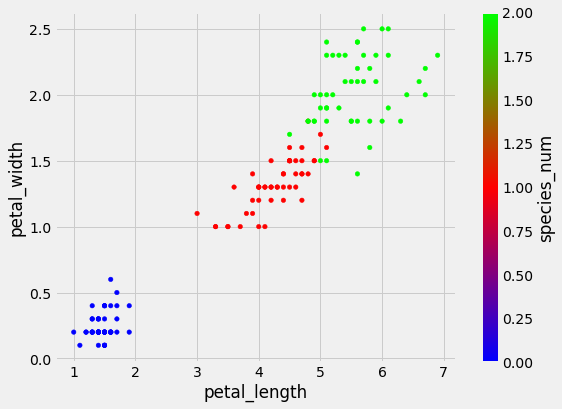

In [127]:
# Scatterplot of petal_length vs. petal_width, colored by species.
colors=['Blue', 'Red', 'Green']
iris.species_num[0]
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010251DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011488B70>]], dtype=object)

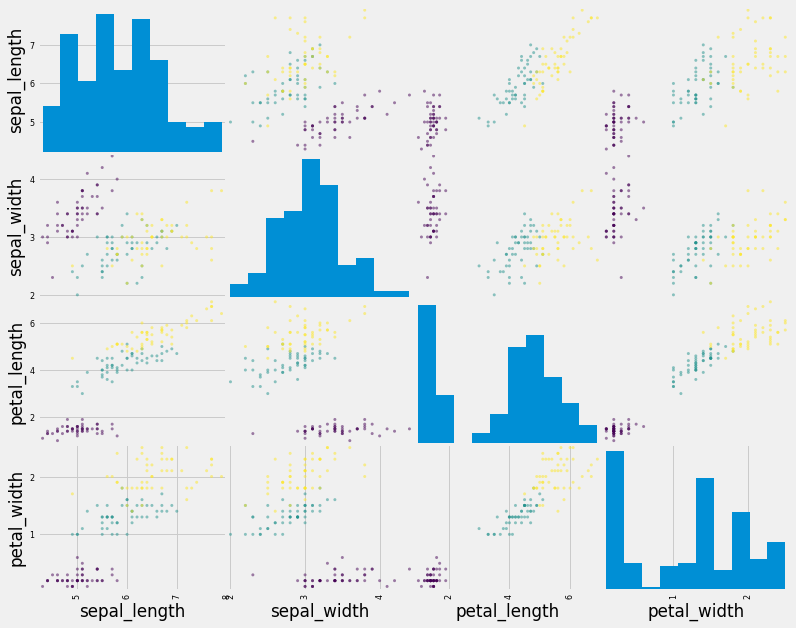

In [128]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12,10))

#### Write down a set of rules that could be used to predict species based on iris measurements.

In [129]:
# Feel free to do more analysis if needed to make good rules!

#### Bonus: Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [130]:
def predict_flower(df):
    preds = ['Iris-setosa'] * len(df)   # temporary!
    # for each row of df, make a prediction
    # you can iterate over the roews and use if/elif/else:
    # for ind, row in df.iterrows():        
    #    if row['your_column'] < some_value:
    #       prediction = 'Iris-setosa'
    #    elif/else:
    #       ...
    #    preds.append(prediction)
    # then add a column to the DataFrame with the predictions
    df['prediction'] = preds # also need this (before) the alternative
    
    # alternatively, you could assign 'blockwise' (using several of the following)
    # df['prediction'] = preds
    # df.loc[(df[df[your_column] > your_value]) & or | 
    #     (df[your_other_column] < your_other_value)].predictions = 'your_species'
    
    
predict_flower(iris)

In [131]:
def predict_flower(df):
    for ind, row in df.iterrows():   
        if df.petal_width >= 1.75:
            prediction = "Iris-virginica"
        elif df.petal_width >= .5:
            prediction = "Iris-versicolor"
        else:
            prediction = "Iris-setosa"
        

In [132]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa


In [133]:
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150.

0.33333333333333331

<a id="human-learning-on-the-iris-dataset"></a>
## Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [134]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [135]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

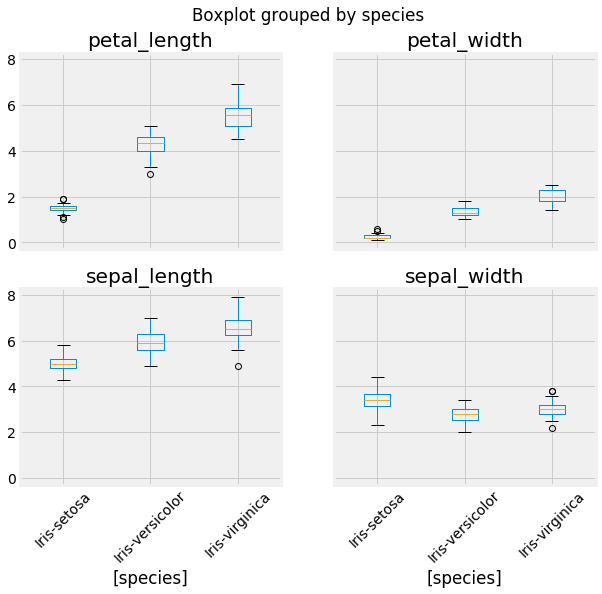

In [136]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

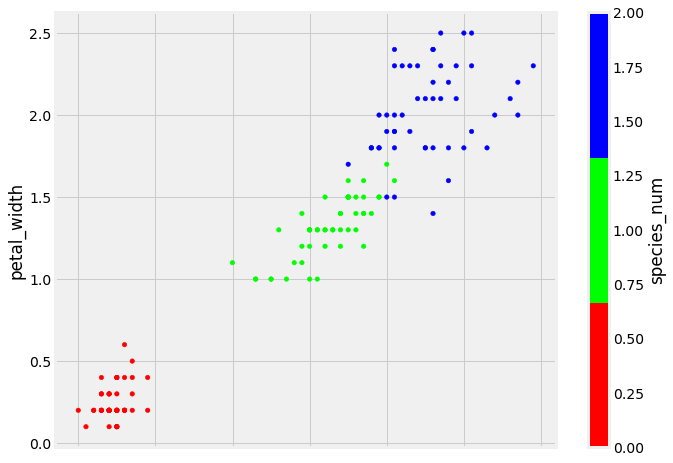

In [137]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

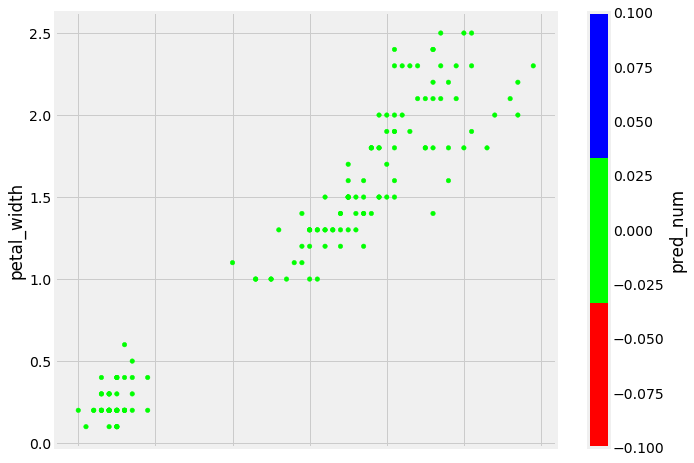

In [138]:
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap=cmap_bold);

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

The visualizations below show how a given area can change in its prediction as K changes. Colored points represent true values and colored areas represent a **prediction space**. If an unknown point was to fall in a space, its predicted value would be the color of that scace.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](./assets/images/iris_01nn_map.png)

### KNN Classification Map for Iris (K=5)

![5NN classification map](./assets/images/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](./assets/images/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](./assets/images/iris_50nn_map.png)

We can see that, as K increases, ie, more neighbors are allowed to 'vote', the classification spaces' borders become more distinct. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by K?** As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. When K=50, outliers no longer affect region boundaries. This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

**Question:** What's the "best" value for K in this case?

**Answer:** ...

**Question:** How does 'complexity' show up in the context of the KNN model? In other words - how does overfitting happen?

**Answer:** ...

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. Its columns are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | | 
| blk | |
| tov | | 
| pf | |

In [161]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [140]:
# Map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [141]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [142]:
# Create response vector (y).
y = nba.pos_num

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Step 2: Train the model on the training set (using K=1).

In [145]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy.

In [146]:
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.6166666666666667

#### Repeating for K=50.

In [147]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.67500000000000004

#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure every classification model.

#### Examine the class distribution.

In [148]:
y_test.value_counts()

2    60
1    49
0    11
Name: pos_num, dtype: int64

#### Compute null accuracy.

In [149]:
y_test.value_counts().head(1) / len(y_test)

2    0.5
Name: pos_num, dtype: float64

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [150]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with data.
knn.fit(X, y)

# Store the predicted response values.
y_pred_class = knn.predict(X)

**Question:** Which model produced the correct predictions for the two unknown irises?

**Answer:** ...

**Question:** Does that mean that we have to guess how well our models are likely to do?

**Answer:** ...

In [151]:
# Calculate predicted probabilities of class membership.
knn.predict_proba(X)

array([[ 0. ,  0.6,  0.4],
       [ 0. ,  0.8,  0.2],
       [ 0.8,  0.2,  0. ],
       ..., 
       [ 0. ,  0.6,  0.4],
       [ 0.6,  0.4,  0. ],
       [ 0.6,  0.4,  0. ]])

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [152]:
accuracies = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    accuracy = float(sum(pred == y)) / len(y)
    accuracies.append([k, accuracy])

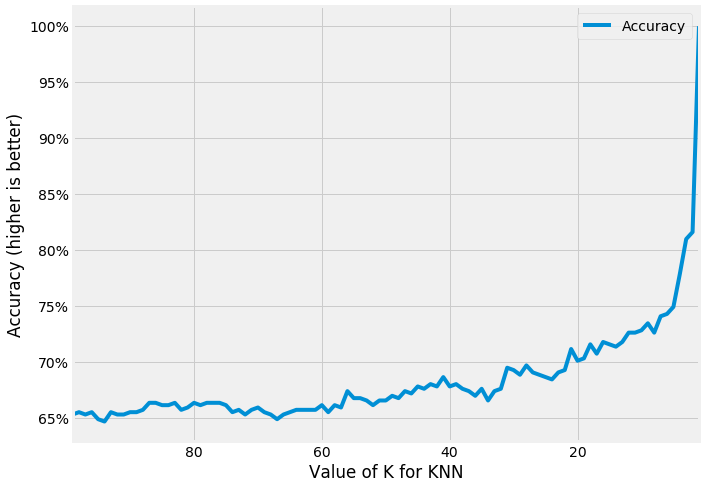

In [153]:
from matplotlib.ticker import FuncFormatter

data = pd.DataFrame(accuracies,columns=['k','Accuracy'])
ax = data.sort_values('k', ascending=False).plot.line(x='k',y='Accuracy')
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy (higher is better)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)));

#### Search for the "best" value of K.

In [154]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = range(1, 101)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = accuracy_score(y, y_pred_class)
    training_error.append(1-training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [155]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
100,0.366667,0.382845
99,0.358333,0.378661
98,0.366667,0.384937
97,0.366667,0.384937
96,0.366667,0.380753


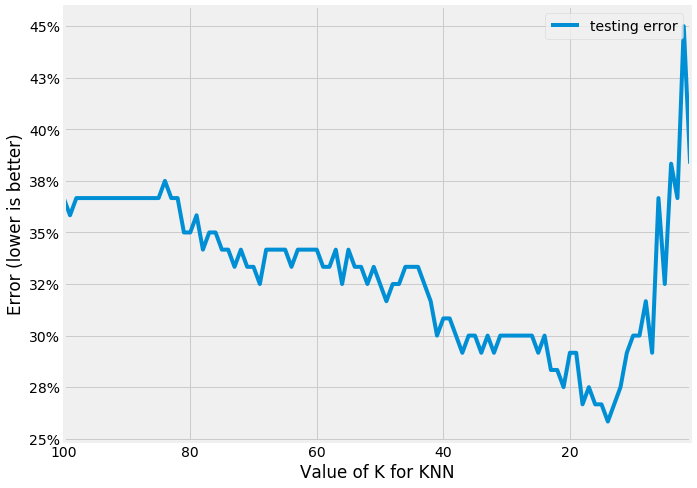

In [163]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
ax = df.plot(y='testing error')
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)));


In [ ]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing error').head()

In [ ]:
# Alternative method:
min(zip(testing_error, k_range))

In [ ]:
df['testing error'].idxmin()

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

In [ ]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
ax = df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)));

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

### KNN & Cross Validation

In [164]:
from sklearn.model_selection import cross_val_score

# using 10% hold out for testing AFTER cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=.1) 

# range of neighbors to test:
neighbors = range(1, 101)

# empty dict that will hold cv scores
cv_scores = {}

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy'))
    cv_scores[k] = score
    
cv_scores = pd.Series(cv_scores)
best_k = cv_scores.idxmax()

In [165]:
# Calculate testing error.
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print testing_error

0.270833333333


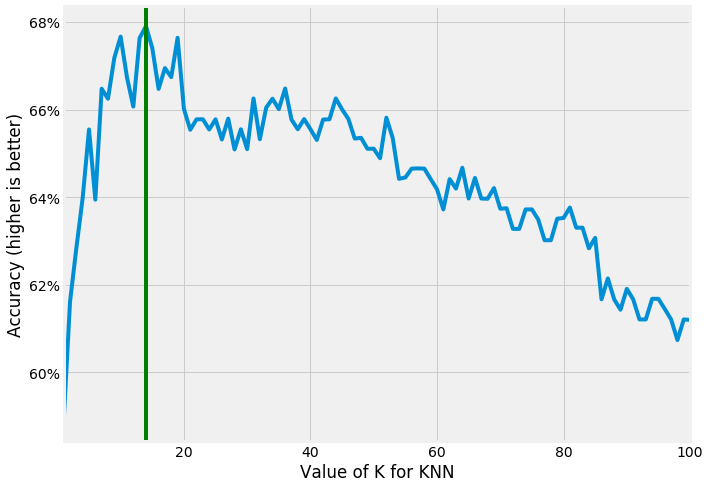

In [166]:
ax = cv_scores.plot()
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy (higher is better)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.axvline(best_k, c='g');

### Automation: `GridSearchCV`

In [ ]:
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=.1) 

knn = KNeighborsClassifier()

# set up dictionary with lists of parameter value to test
param_grid = {'n_neighbors': neighbors}

cv = GridSearchCV(knn, param_grid, scoring='accuracy', cv=10)
cv.fit(X_train, y_train)

In [ ]:
cv.grid_scores_[:5]

In [ ]:
best_model = cv.fit(X_train, y_train)
cv.best_estimator_

In [ ]:
cv.best_params_

#### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [ ]:
import numpy as np

# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=cv.best_params_['n_neighbors'])

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

In [ ]:
# or: 
best_model.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

What could we conclude?

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

In the case of KNN on the iris data set, imagine we measure sepal length in kilometers, but we measure sepal width in millimeters. Our data will show variation in sepal width, but almost no variation in sepal length.

Unfortunately, KNN cannot automatically adjust to this. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortunately, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

#### Separate feature matrix and response for scikit-learn.

In [ ]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Instantiate and fit `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# save one line:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99) 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X=X_train, y=y_train)
float((knn.predict(X_test) == y_test).sum())/len(y_test)

### Scaler & Cross Validation: Pipeline & GridSearch

In [ ]:
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# range of neighbors to test:
neighbors = range(1, 101)

# empty dict that will hold cv scores
cv_scores = {}

# perform 10-fold cross validation
for k in neighbors:
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    cv_scores[k] = np.mean(cross_val_score(pipeline, X=X_train, y=y_train, cv=10))

print pd.Series(cv_scores).sort_values(ascending=False).head()
pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

# combine scaler with model
scaler = StandardScaler()
knn = KNeighborsClassifier()

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline

In [ ]:
# define parameter grid to search - need to reference pipeline 'step'
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 101))}

cv = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10)
cv.fit(X_train, y_train)

In [ ]:
cv.best_estimator_

In [ ]:
cv.best_params_

In [ ]:
accuracy_score(y_true=y_test, y_pred=cv.best_estimator_.predict(X_test))

<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.